# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

In [ ]:
import base64

filename = "dog.jpeg"

try:
    with open(filename, "rb") as img_file:

        b64_string = base64.b64encode(img_file.read()).decode('utf-8')

    print(f"Successfully encoded {filename}!")
    print(b64_string)

except FileNotFoundError:
    print(f"Error: Could not find '{filename}'. Make sure you dragged it into the Files folder on the left!")

Successfully encoded dog.jpeg!
/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBwgHBgkIBwgKCgkLDRYPDQwMDRsUFRAWIB0iIiAdHx8kKDQsJCYxJx8fLT0tMTU3Ojo6Iys/RD84QzQ5OjcBCgoKDQwNGg8PGjclHyU3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N//AABEIAJQAmAMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAEAAIDBQYBBwj/xAA1EAACAQMDAgUCBgECBwAAAAABAgMABBESITEFQQYTUWFxIoEUIzKRodFCUrEHFTOSweHw/8QAGQEAAwEBAQAAAAAAAAAAAAAAAAIDBAEF/8QAIREAAgICAgIDAQAAAAAAAAAAAAECEQMhEjEiMgQTUUH/2gAMAwEAAhEDEQA/AN0DtXM4psZyKcacUcpzTqiDYNSZoAVLJpjuqAlyAo5NVd11q3SUQwuHbO+O1JPJGPbHjCUukWxbFRyThO29MS4VoVMZLsfal5JO7Eioyyt+pWOJL2GG8wBuBvjGK7FdLINyAfmh5oiv0ZyGoOSPy2ZkbCkZ2HaoffOL2W+mDWi2JPcGkDtVfa3TLgTH6T68j5oxzpGe3rWjHnU9GfJicNid8VEp2qN5Mtiu52q1khxcscVNGmKgTGcmpGmVBzXbAnLYqLzNbYoGW61HC53om1GmMueTRYUFauwpU2M5NKugP0kHapQdsd6hE2P1qRXRIucg4oOD2G1cUnAFIyL61zUvrQBVeJb9LOxIfGt9lUn+TWY8NpJPfhQCVB44z80Z4zTXeRB9WnTsfvRngqzX8ycnOW2rzsjc81HoY1wxWakSiGMu0RCY5ArHQePFu+sCwjs2WFnCJPq2LHOB/BrcSqr6UOCBvvWUsvC/T7Dqk3UVgVGdsoucge5/erS0Sjsu+oZECED6wP5oa

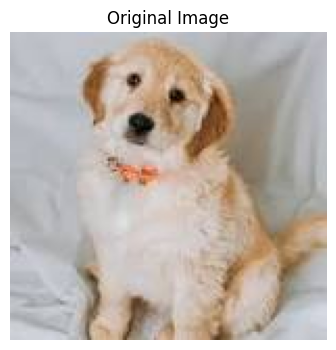

In [ ]:
import base64
import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

base64_image = """
/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBwgHBgkIBwgKCgkLDRYPDQwMDRsUFRAWIB0iIiAdHx8kKDQsJCYxJx8fLT0tMTU3Ojo6Iys/RD84QzQ5OjcBCgoKDQwNGg8PGjclHyU3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N//AABEIAJQAmAMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAEAAIDBQYBBwj/xAA1EAACAQMDAgUCBgECBwAAAAABAgMABBESITEFQQYTUWFxIoEUIzKRodFCUrEHFTOSweHw/8QAGQEAAwEBAQAAAAAAAAAAAAAAAAIDBAEF/8QAIREAAgICAgIDAQAAAAAAAAAAAAECEQMhEjEiMgQTUUH/2gAMAwEAAhEDEQA/AN0DtXM4psZyKcacUcpzTqiDYNSZoAVLJpjuqAlyAo5NVd11q3SUQwuHbO+O1JPJGPbHjCUukWxbFRyThO29MS4VoVMZLsfal5JO7Eioyyt+pWOJL2GG8wBuBvjGK7FdLINyAfmh5oiv0ZyGoOSPy2ZkbCkZ2HaoffOL2W+mDWi2JPcGkDtVfa3TLgTH6T68j5oxzpGe3rWjHnU9GfJicNid8VEp2qN5Mtiu52q1khxcscVNGmKgTGcmpGmVBzXbAnLYqLzNbYoGW61HC53om1GmMueTRYUFauwpU2M5NKugP0kHapQdsd6hE2P1qRXRIucg4oOD2G1cUnAFIyL61zUvrQBVeJb9LOxIfGt9lUn+TWY8NpJPfhQCVB44z80Z4zTXeRB9WnTsfvRngqzX8ycnOW2rzsjc81HoY1wxWakSiGMu0RCY5ArHQePFu+sCwjs2WFnCJPq2LHOB/BrcSqr6UOCBvvWUsvC/T7Dqk3UVgVGdsoucge5/erS0Sjsu+oZECED6wP5oaCMtDJNjYb+5xTricSMAe3NZ3xl4mPR+nW6xBA0zuAxOBsM4rPqUi3rEtJyTH5rI2nGSAOaL6a6yIUJLoByBxx/dUHhLxIfEVk+YfKnhI1LnOKuunk2N5L5gJiddiOR8fzXIrjMG7jodcxeW2tMtH/qqPzQBzQXTetR311dWhdXWNyobuR2NNZ2V2Rs7HvWnHl5aM2XFx2GNOANqHZ2c87VFqzT1NV5EqJ7ZBkbVYsdKgCg7QZJPpRIOpqdHGEwDYUqdD2pU4rJiFI4qNoVPamq+KkDg0ARGHHam6aKOCKbpFAMqer2AvrZ1P/UUHQ381X+FJXgkigwRnOoEdxWkYYBKjJHFA9F6QbQ+dcyF7kryBhd+cVky4/NOJqxT8HFhryyvKY0B3OCaD6pf2NjpjurmFHbhWYZP2q1lkW3tvN+5Ir588UTMnW7ya4fzFlkYowbcDPGPim4fov2V0j1uJ3mZcZwcnY7Y+apr3p0HV5Vt7kZjjbWyHvtjNUn/AAtu+oXNzNDIsj2iJu0gOFPYD+a1hjeHqCyhQsZByM9qyzhwZohPmhdB6Da2Zf8ACJ5cQ4xsx9s0f1F0tOi3ktw+QikR554qSwkDM7DIGdvis144vDIbS2jfI0M8iqc7kjGf2pvHjZxcnKig6TK1nfR3bOdTYEh9a2dzpMpdcgMODWLhT8zS4OAF49ztWs1HykVmyQN6ni9ymb0HhgKerZcYofVU9uMuK2WYqLSL8uKp7cHBNDOdgBRluPoqqJhEXtSrkJ3NdqgrG4pZxXd6b3oAkR/WpQc0NTleiwJidqkhLMwAb7mmxrtuRQ98/wCHikmjBLIpbAIGrHbJ2qUmViibqFotzDJb+YVDDtzXmfV/Bt00qv8AhXuEU7GMgn9tq3tl1fz3KTxiCU4+nzATjcZ/ij9YP1bUlp7HUWtGf8MWK9NsFt2Ty3HK+tWM0BmwNAc6fTgVaKLecYAA+1Pijjij0KNwK442dTpmW6vMnSrPSMmV1wigcVho43uLvG8rt2A3J7/716B4qtWuoFMYOtcYIGaF8N9JTp0Ts4zK5+pz6dvtWOSfJo1QaSspIelm2kWW6/VpwFokuN/etFeWhn1Y8tW7uVyQPasvMyrKyoSQCQCe9PjjRLJJslVsmjbPGv4quQ0fY7tV49kJdFg53qwhGIx8VV68yYq0XaIfFXiSJLY5BNKm2Z/LPzSp0KzuT/qpFWG/NMU5FTqc0AMBzsaRUh+dhXTh3xwaR5NB0LgiDLuTSuYdQKMoKkcEZrsTggEGiGwVzU6sp0ZXqdosQadpHJU5aQqoYL6Db/fPelLJJFZkw3A8qQYDFdgSNiPufSrp4hM51Lkeldayili8qWNWTb6TxWafx7fJM2YvltR4NWU3S5OoExkyJIiYOpBjI99qug0rEtx7UXaW0cMAiiULGowF9qfJHtsKMWKUY7YZvkRyS6K1kVmy4JzziuMqxb5wp7mj2jTOB+oUDK6Ccxtg5BBXke1M1RJSvo6GVVJVhj1rLX9qLgNNBkaScire/V44C7krp2UDt/dB9JVnV1Yfq96g5+SRRR8bKJXHGasbE/SSaivLbyrplKBfTFT2pVRpPNaIbM09E0Z0yZNWof8AK+1V4UHg0SHATc7Yqy0SDLA5h+5rlR2MgSPQe5zSp0zlCUlfiioiCKikirkRMbYNAD3+iVX7d6kxneuTAED0py8CugT2+64xRP8AhQMEuH0UchBFIMciiJJOKdpIomEqBvULtliBQwXY4EIMU12yNuaWknk0ilK7HVETOCT9I3odrfDlgMqxyRniiQMN9qi1Zm0t+rGdI5NLxGsreoIGVdWc5zsM0DZxeVI2nff1q16igIAHPYcH7UDJEYwhDM2edRzUJx8isZeNAHWW1FJNOMHehYwAcjf5o69UyRSK5yrYK55G1VUM2ldLcijHLyoXJDVlmrACuxsrfWwyM7CgPxGdgeaPtondR6dqeWZR0JHC5bCPMDb8Uqkhswx+osT7HalQs0vwb6Y/oazCYfksHYbkA1AdQ7UckKJJ5iKA2MZxzT3iV98VsozFcJCeaesm9TSW47c0LMpjUk7AUoETzHzi67AVbwksuRwazysWYgbmrzpjE266uQMGp8tlF0HR6iOdvSuqQKZqwDio98YzTMEE6yf0jakwbviouODgUvNydjxXLAcR3NQzKrYJGWU5X1rjT+WMOMjv+9DT6nnUxkjbGxpXJIZRGzs8+CrqunswoacNtkDudu9EXLSImY1J/aqW46iAUVGO43B5A9ajKSSspGLb0S3Tp5Z0777fFVFzbeZ9a5GOR6irEQyXW6LgftREdqIvpY/XjG3asluUtGmko0yisoXdiSCVFX8LhYhhePWqN7kWtwysMb/GKfBcXF1N+W7FOKaHYkui7t79RIVIPzilU1rDpUZO9Ktcccq2zNLKkw0Tn2qSOf6gGxg0IJY/8o2U/FPBiP1ZIHsK1mcMfY1BOA8ZVgCDzUkcqP8AQT8E1xkLMAVbR2IoAw/Wbi66RIGAaRAckD/IVqvDl3Fe2InhJKN68g+lC9dtVkgKkAkg6P6ofwVcJ+CkhC6XikIb3zvWRrjKzRFtxo1DbbVwA9qimlCKWJxihF6raqQrzorHbSW3qqkv6Lxf8LDUe9MiHY+tcEgYVwEmRcetD7BD7iIkfYig5ESUkad0x3o+5cqPf2oR0DfWqgNwWHNJJDxZX3Wbe3keN2Gj/EHjPqPSsx0e2kvp2eRyy6jnO2T/AFWj69bi6sJYhJpcjZs4x/YoXotsbdoYtOQf8vWsuRW6Lw0rLmG3EURVV4FRm21QkPjPfNWWBpoO+fETaeV3NaOEUiTk2zB3SSXfUZWydIbGk9jV/wBLhEaAYANVyPrupHXcFjpxVzaiQqNKb/NGKC7J5Ju6LOJdq7UaGcY4xSrURJmdWBCMoPqRmoY7dgxImQ59BRUlghB0kg0O1tcxHKjUKDg9rIOuHk29AMU6MeUPLW5Z24HmHeoDKwP5quvuRtU0ZVm8wEEKNjQBS+J7v8NEmM515xUfhG1aO0d87u5LexpnWk/F9TtYG4kcg57ACr20eC0iS30FEUAKx/usk35bNUFrQ2+UiP8AV8D1rzXqscr9XlfgoQRXpnUJES3ZmIIG9eeWwa/uriaTYvKQMcYBxilluQ60i96D1O5W3SOVnbUf1NWks7kyXKINwO9VllZqqgAAYA1Z2zToLryepwqiny2fSW+ao/BbJ+3RoZG7kZzQNzI8DbbhqluJgoAII/8AFVF9ctnMZIGd80mSY0IkN1EZ7iNpGIYMMAdx3zV5HGBJqwMKoC7cVmbq5hs7yA6nMkmSQeBV9aXJuAHJwppMW3seekHPIW3xgGqjrFwqROc7AEYJ7/8AvNP6n1FbSPWuHZdmUGoY4VvCk0y/lBtaK3c+/tVn5aIp1sg6N09vKWWVN23AIq9gtSewArsDKxAQ0WDgVojFJEJNtnY7VcbiuVIso77Uqc4NVjmnUqVcA44Gnig7hViOY1Clhvgc12lQwM11geVfWM6bOJ0H/dsf96up1DoS2+e33pUqw5uzXiKXxbI8fR5GRiDjGfuKB6daxQrHEgOlQMZpUqWHZ2fRfJIRFEMD8x9JPtg09oU/5hBt3z+1dpU+TbRzG6iHTjYf/dqpbkBtSHj+65SpMpTGYO5up7jqflyyMVj2QelbPoxY2EalmwTnmlSrsF5E5t0aC3gjEbDSMN+rPeopAPMCDZfQUqVbEjM2F24C4AFTsdqVKnFGKxpUqVAH/9k= """

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data)).convert('RGB')

img_rgb = np.array(img)

plt.figure(figsize=(6,4))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Original Image")
plt.show()

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

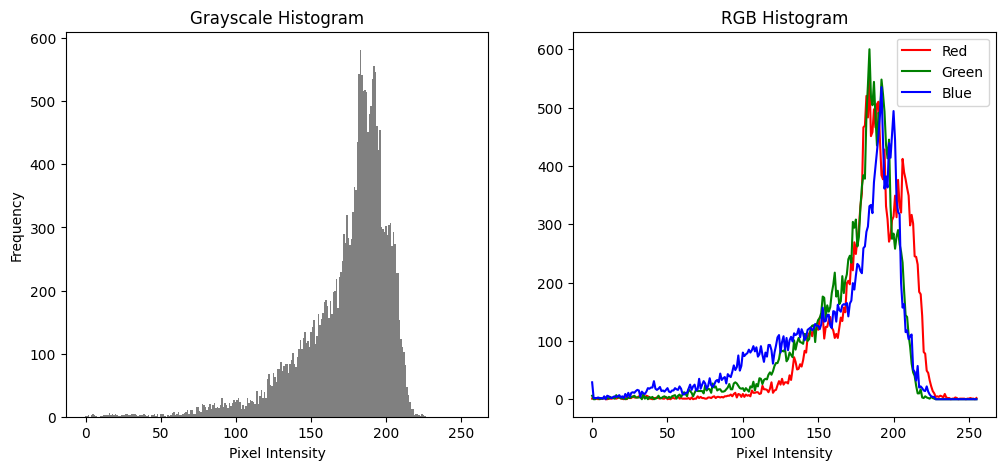

In [ ]:
def gray_histogram(gray_img):
    """
    Calculates the frequency of pixel intensities 0-255 using pure NumPy.
    Input: grayscale image (2D numpy array)
    Output: array of shape (256,) containing counts
    """

    counts = np.zeros(256, dtype=int)


    flat_img = gray_img.ravel()


    for pixel in flat_img:
        counts[pixel] += 1

    return counts


#Convert to Grayscale manually (Weighted average formula)
# Formula: 0.299*R + 0.587*G + 0.114*B
gray_img = np.dot(img_rgb[...,:3], [0.299, 0.587, 0.114]).astype(np.uint8)

#Compute Histogram
hist_gray = gray_histogram(gray_img)

#Compute RGB Histograms (Process each channel separately)
r_hist = gray_histogram(img_rgb[:,:,0])
g_hist = gray_histogram(img_rgb[:,:,1])
b_hist = gray_histogram(img_rgb[:,:,2])

#Plotting
plt.figure(figsize=(12, 5))

# Plot Grayscale
plt.subplot(1, 2, 1)
plt.bar(range(256), hist_gray, color='gray', width=1.0)
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Plot RGB
plt.subplot(1, 2, 2)
plt.plot(r_hist, color='red', label='Red')
plt.plot(g_hist, color='green', label='Green')
plt.plot(b_hist, color='blue', label='Blue')
plt.title("RGB Histogram")
plt.xlabel("Pixel Intensity")
plt.legend()

plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

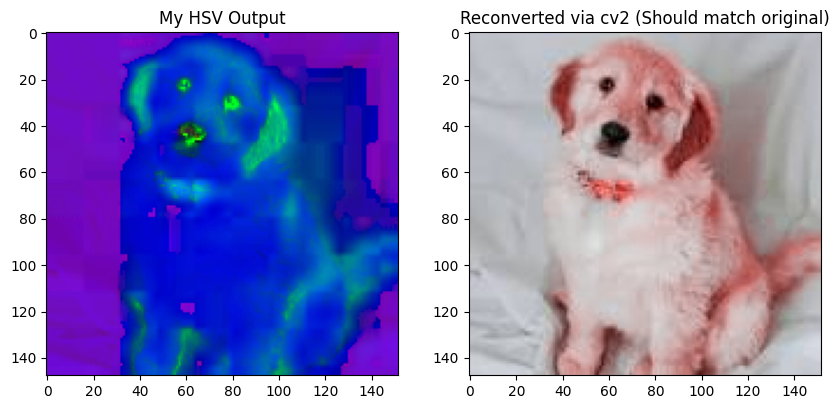

In [ ]:
def rgb_to_hsv(img_rgb):

    img_float = img_rgb.astype(np.float32) / 255.0


    r, g, b = img_float[:,:,0], img_float[:,:,1], img_float[:,:,2]


    c_max = np.max(img_float, axis=2)
    c_min = np.min(img_float, axis=2)
    delta = c_max - c_min


    v = c_max * 255.0


    s = np.zeros_like(c_max)
    non_zero = c_max != 0
    s[non_zero] = (delta[non_zero] / c_max[non_zero]) * 255.0


    h = np.zeros_like(c_max)

    delta_nz = delta.copy()
    delta_nz[delta == 0] = 1


    is_r = (c_max == r)
    is_g = (c_max == g) & (~is_r)
    is_b = (c_max == b) & (~is_r) & (~is_g)


    # Red Max: (G - B) / Delta
    h[is_r] = 60 * ((g[is_r] - b[is_r]) / delta_nz[is_r]) % 6
    # Green Max: (B - R) / Delta + 2
    h[is_g] = 60 * ((b[is_g] - r[is_g]) / delta_nz[is_g] + 2)
    # Blue Max: (R - G) / Delta + 4
    h[is_b] = 60 * ((r[is_b] - g[is_b]) / delta_nz[is_b] + 4)

    # Fix negative angles and undefined hues
    h[h < 0] += 360
    h[delta == 0] = 0

    # Scale Hue for OpenCV (0-360 degrees -> 0-179 byte)
    h_opencv = h / 2

    # Stack and return
    hsv_img = np.dstack((h_opencv, s, v)).astype(np.uint8)
    return hsv_img


hsv_result = rgb_to_hsv(img_rgb)

# Convert BACK to RGB using OpenCV to verify correctness
reconverted_rgb = cv2.cvtColor(hsv_result, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(hsv_result); plt.title("My HSV Output")
plt.subplot(1,2,2); plt.imshow(reconverted_rgb); plt.title("Reconverted via cv2 (Should match original)")
plt.show()

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

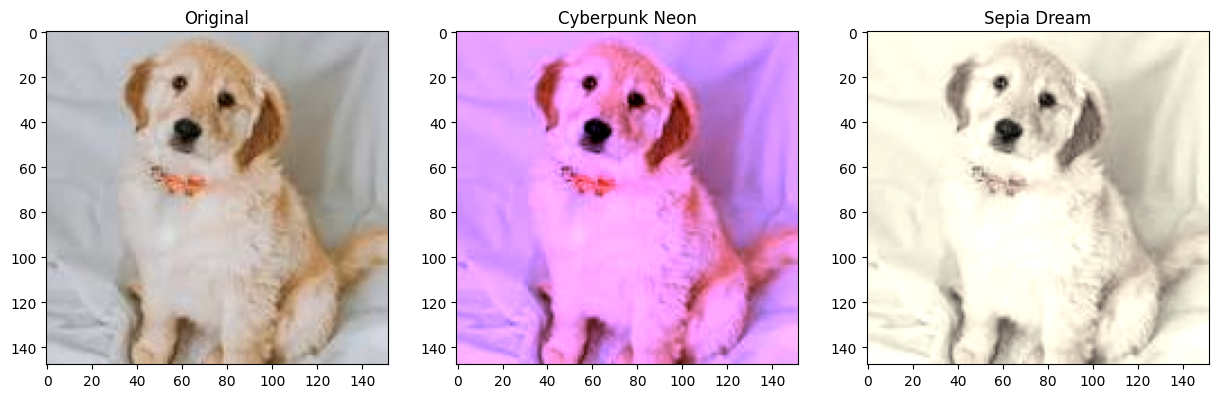

In [ ]:
def filter_cyberpunk_neon(img):
    """
    Modifications:
    1. Channel Mixing: Boost Blue/Purple, cut Green.
    2. Contrast: High contrast curve.
    Suited for: Night street photography or machinery.
    """
    output = img.copy().astype(float)

    # 1. CHANNEL MIXING (Purple/Blue Tint)
    output[:,:,2] = output[:,:,2] * 1.4  # Boost Blue significantly
    output[:,:,0] = output[:,:,0] * 1.1  # Boost Red slightly
    output[:,:,1] = output[:,:,1] * 0.8  # Cut Green

    # 2. CONTRAST BOOST
    # Formula: Factor * (Pixel - 128) + 128
    contrast = 1.3
    output = (output - 128) * contrast + 128


    return np.clip(output, 0, 255).astype(np.uint8)


def filter_sepia_dream(img):
    """
    Modifications:
    1. Custom Color Tint: Applies a Sepia matrix manually.
    2. Softness: Slight brightness lift (Gamma).
    Suited for: Portraits, historical buildings, old aesthetics.
    """
    output = img.copy().astype(float)

    # 1. SEPIA TINT (Matrix transformation)
    # r_new = 0.393R + 0.769G + 0.189B
    # g_new = 0.349R + 0.686G + 0.168B
    # b_new = 0.272R + 0.534G + 0.131B
    r = output[:,:,0]
    g = output[:,:,1]
    b = output[:,:,2]

    output[:,:,0] = 0.393*r + 0.769*g + 0.189*b
    output[:,:,1] = 0.349*r + 0.686*g + 0.168*b
    output[:,:,2] = 0.272*r + 0.534*g + 0.131*b

    # 2. GAMMA CORRECTION (Soft Brightness)
    output = output / 255.0
    output = np.power(output, 0.9) # < 1.0 brightens shadows
    output = output * 255.0

    return np.clip(output, 0, 255).astype(np.uint8)


res_cyber = filter_cyberpunk_neon(img_rgb)
res_sepia = filter_sepia_dream(img_rgb)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(1,3,2); plt.imshow(res_cyber); plt.title("Cyberpunk Neon")
plt.subplot(1,3,3); plt.imshow(res_sepia); plt.title("Sepia Dream")
plt.show()

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

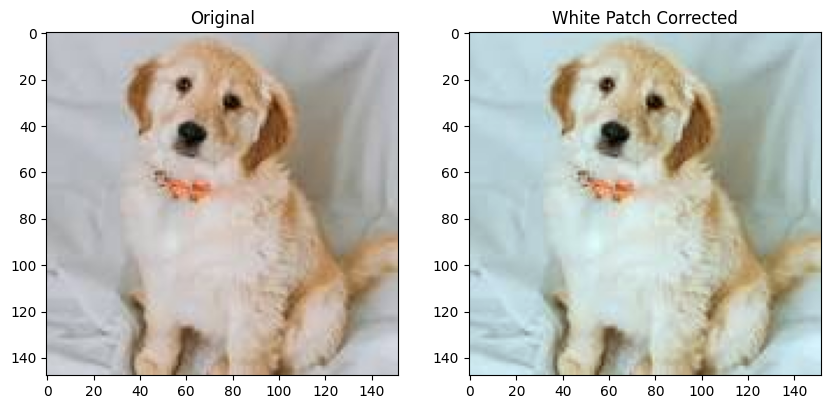

In [ ]:
def white_patch_balance(img_rgb):
    """
    White Patch Algorithm:
    Assumption: The brightest pixel in each channel should be 255.
    We find max(R), max(G), max(B) and scale the entire channel.
    """
    img_float = img_rgb.astype(float)


    max_vals = np.max(img_float, axis=(0, 1))


    max_vals[max_vals == 0] = 255


    scale = 255.0 / max_vals


    balanced = img_float * scale

    return np.clip(balanced, 0, 255).astype(np.uint8)


wb_image = white_patch_balance(img_rgb)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(wb_image); plt.title("White Patch Corrected")
plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

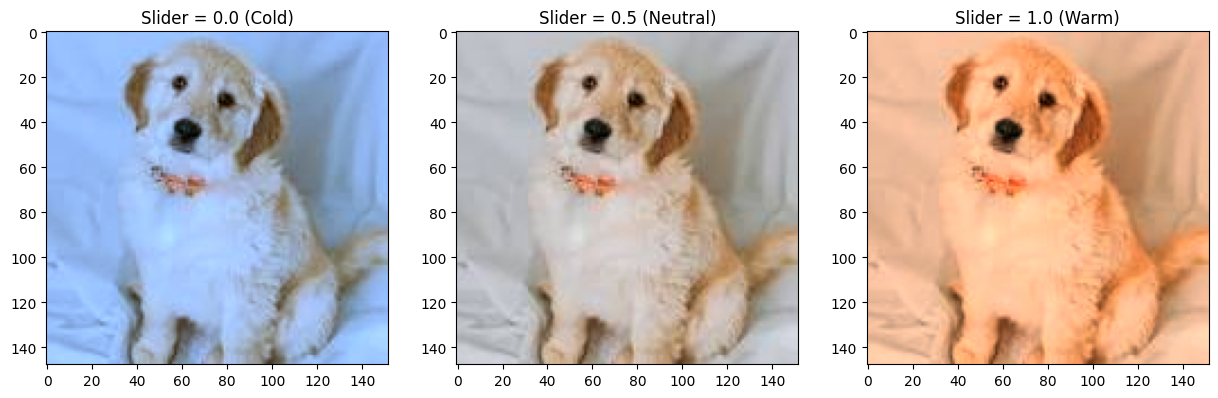

In [ ]:
def white_balance(img_rgb, value):
    """
    Simulates Warm/Cool slider.
    value = 0.0 -> Coldest (Boost Blue, Cut Red)
    value = 0.5 -> Original
    value = 1.0 -> Warmest (Boost Red, Cut Blue)
    """
    img_float = img_rgb.astype(float)

    if value < 0.5:

        factor = (0.5 - value) * 2

        # Add Blue, Remove Red
        img_float[:,:,2] *= (1 + 0.3 * factor)
        img_float[:,:,0] *= (1 - 0.2 * factor)

    elif value > 0.5:

        # Calculate strength (1.0 is strongest, 0.5 is zero strength)
        factor = (value - 0.5) * 2

        # Add Red, Remove Blue
        img_float[:,:,0] *= (1 + 0.3 * factor)
        img_float[:,:,2] *= (1 - 0.2 * factor)

    return np.clip(img_float, 0, 255).astype(np.uint8)


cold_img = white_balance(img_rgb, 0.0)
warm_img = white_balance(img_rgb, 1.0)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(cold_img); plt.title("Slider = 0.0 (Cold)")
plt.subplot(1,3,2); plt.imshow(img_rgb); plt.title("Slider = 0.5 (Neutral)")
plt.subplot(1,3,3); plt.imshow(warm_img); plt.title("Slider = 1.0 (Warm)")
plt.show()